In [1]:
# Helper function
class SummaryKeys():
    
    def __init__(self) -> None:
        self.keys = ["FWPT", 
                     "FGPT",
                     "FOPT",
                     "WWPT",
                     "WGPT",
                     "WOPT",
                     "FWPR",
                     "FGPR",
                     "FOPR",
                     "WWPR",
                     "WGPR",
                     "WOPR",
                     "FWIT", 
                     "FGIT",
                     "FOIT",
                     "WWIT",
                     "WGIT",
                     "WOIT",
                     "FWIR",
                     "FGIR",
                     "FOIR",
                     "WWIR",
                     "WGIR",
                     "WOIR",
                     "FGOR",
                     "WFOR",
                     "WBHP"]



def get_summary(realizations, storage):
    
    casename = list(realizations.keys())[0]
    
    real_path = realizations[casename]
    summary = EclSum(real_path)
    
    summary_keys = summary.keys()
    available_keys = ["YEARS"]
    for k in summary_keys:
        for _k in SummaryKeys().keys:
            if _k in k:
                available_keys.append(k)
                
    data_dir = os.path.join(storage, "results", "summary")
    Path(data_dir).mkdir(parents=True, exist_ok=True)
    
    summary_dict = {}
    pbar = tqdm(available_keys, total=len(available_keys), desc="Summary: ")
    for k in pbar:
        pbar.set_description(f"Extracting {k}")
        for casename in realizations:
            
            try:
                tmp = summary_dict[casename]
            except:
                summary_dict[casename] = {}
            
            real_path = realizations[casename]
            summary = EclSum(real_path)
            vector = summary.numpy_vector(k)
        
            real_dir = os.path.join(data_dir, casename)
            Path(real_dir).mkdir(parents=True, exist_ok=True)
            
            filename = os.path.join(real_dir, f"{k}.npy")
            np.save(filename, vector)
            
            summary_dict[casename][f"{k}"] = filename
    
    return summary_dict

In [2]:
import numpy as np
from src.utils.utilities import read_json
import matplotlib.pyplot as plt
import os
from pathlib import Path
from datetime import datetime
from tqdm import tqdm
from ecl.summary import EclSum

COLORS = ['green', 'red']
TEXTS = ["Unconstrained", "Constrained"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=COLORS[i], 
            label="{:s}".format(TEXTS[i]) )[0]  for i in range(len(TEXTS)) ]

study_paths = dict()
study_paths['Unconstrained'] = './simulations/studies/IE_Egg_4Controls.json'
study_paths['Constrained'] = './simulations/studies/IE_Egg_4Controls_const.json'

plt.close()

Text(0.5, 1.0, 'NPV')

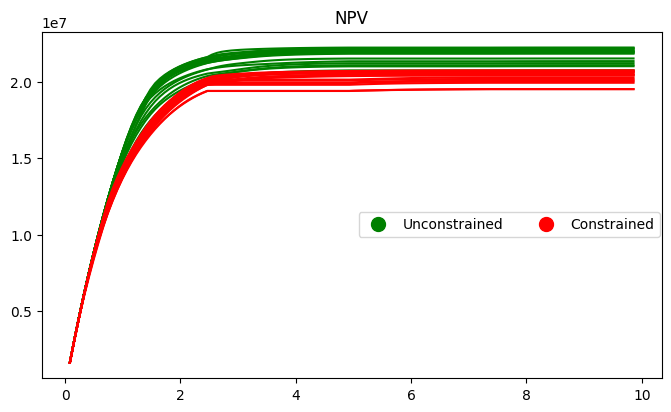

In [3]:
# NPV
fig, ax = plt.subplots(figsize=(8,4.5))
for i, _case in enumerate(study_paths.keys()):
    study = read_json(study_paths[_case])
    
    years = np.load(study['extension']['optimization']['YEARS'])
    npv = np.load(study['extension']['optimization']['NPV'])
    
    npv_mean = np.cumsum(npv, axis=0)
        
    ax.plot(years, npv_mean, color=COLORS[i])
    
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
           loc='best', ncol=2, numpoints=1 )
plt.title('NPV')

In [4]:
# Get summary paths
summary_data = dict()
for _case in study_paths.keys():
    study = read_json(study_paths[_case])    
    realizations = study['extension']['realizations']
    storage = study['extension']['storage']
    
    summary = get_summary(realizations, storage)
    summary_data[_case] = summary



Extracting WWPR:PROD4: 100%|██████████| 39/39 [00:00<00:00, 40.26it/s]  


Unconstrained
Constrained


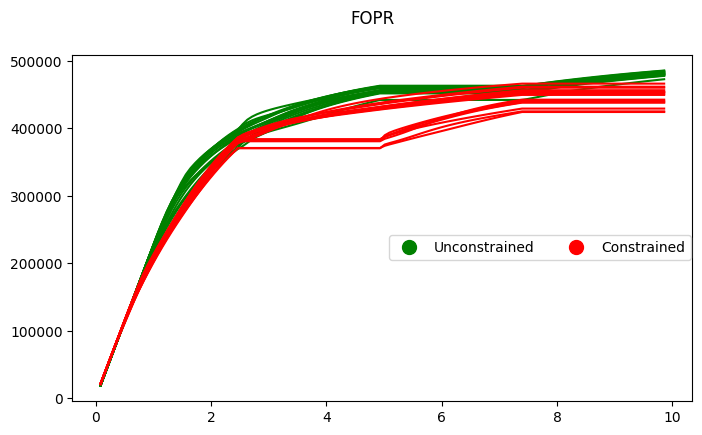

In [5]:
# FOPR
fig, ax = plt.subplots(figsize=(8,4.5))
for i, _case in enumerate(study_paths.keys()):
    print(_case)
    study = read_json(study_paths[_case])    
    years = np.load(study['extension']['optimization']['YEARS'])
    
    vectors = []
    for real_name in summary_data[_case].keys():
        sum_path = summary_data[_case][real_name]['FOPT']
        vector = np.load(sum_path)
        vectors.append(vector)
    
    vectors = np.array(vectors).T
    # vectors = np.mean(vectors, axis=1)

    ax.plot(years, vectors, color=COLORS[i])
    
fig.suptitle("FOPR")
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
           loc='best', ncol=2, numpoints=1 )

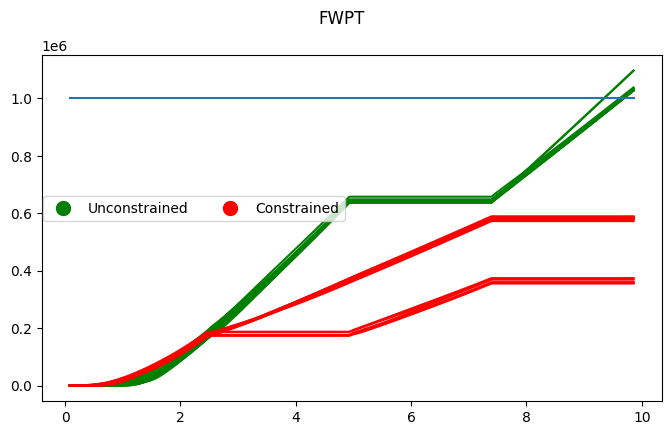

In [6]:
# FWPT
fig, ax = plt.subplots(figsize=(8,4.5))
for i, _case in enumerate(study_paths.keys()):
    study = read_json(study_paths[_case])    
    years = np.load(study['extension']['optimization']['YEARS'])
    
    vectors = []
    for real_name in summary_data[_case].keys():
        sum_path = summary_data[_case][real_name]['FWPT']
        vector = np.load(sum_path)
        vectors.append(vector)
    
    vectors = np.array(vectors).T
    # vectors = np.mean(vectors, axis=1)

    ax.plot(years, vectors, color=COLORS[i])
    
fig.suptitle("FWPT")
ax.plot(years, [1000000 for i in years])
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
           loc='best', ncol=2, numpoints=1 )

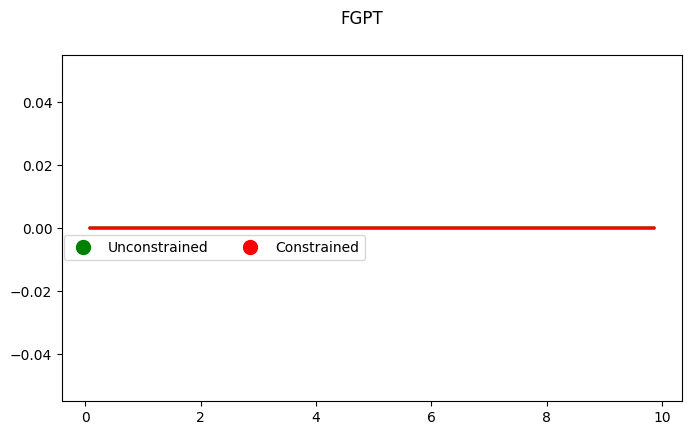

In [7]:
# FWPT
fig, ax = plt.subplots(figsize=(8,4.5))
for i, _case in enumerate(study_paths.keys()):
    study = read_json(study_paths[_case])    
    years = np.load(study['extension']['optimization']['YEARS'])
    
    vectors = []
    for real_name in summary_data[_case].keys():
        sum_path = summary_data[_case][real_name]['FGPT']
        vector = np.load(sum_path)
        vectors.append(vector)
    
    vectors = np.array(vectors).T
    # vectors = np.mean(vectors, axis=1)

    ax.plot(years, vectors, color=COLORS[i])
    
fig.suptitle("FGPT")
# ax.plot(years, [120000 for i in years])
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
           loc='best', ncol=2, numpoints=1 )

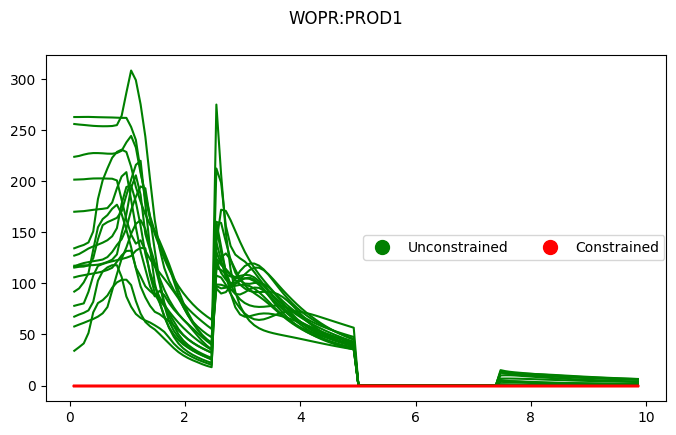

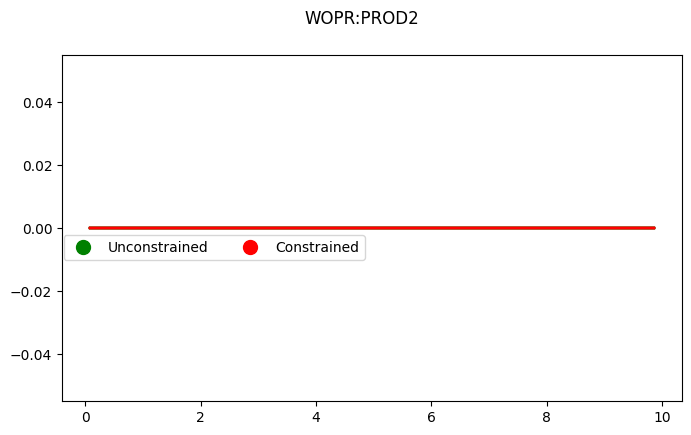

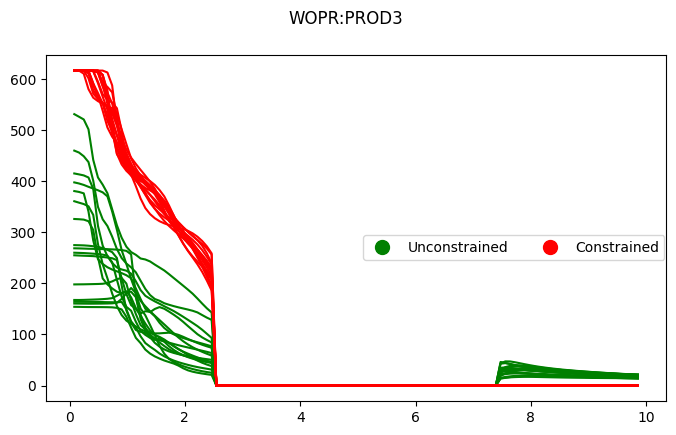

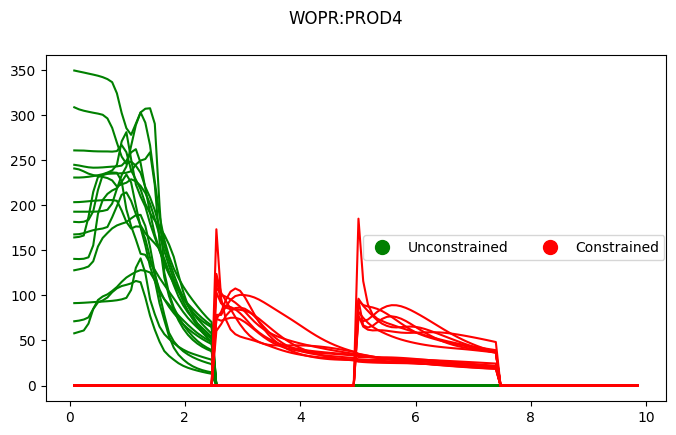

In [8]:
prod_names = ["PROD1", "PROD2", "PROD3", "PROD4"]

for well in prod_names:
    prop_name = f"WOPR:{well}"
    # WBHP
    fig, ax = plt.subplots(figsize=(8,4.5))
    for i, _case in enumerate(study_paths.keys()):
        study = read_json(study_paths[_case])    
        years = np.load(study['extension']['optimization']['YEARS'])
        
        vectors = []
        for real_name in summary_data[_case].keys():
            sum_path = summary_data[_case][real_name][prop_name]
            vector = np.load(sum_path)
            vectors.append(vector)
        
        vectors = np.array(vectors).T
        # vectors = np.mean(vectors, axis=1)

        ax.plot(years, vectors, color=COLORS[i])
        
    fig.suptitle(prop_name)
    plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
            loc='best', ncol=2, numpoints=1 )

(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)
(120, 16)


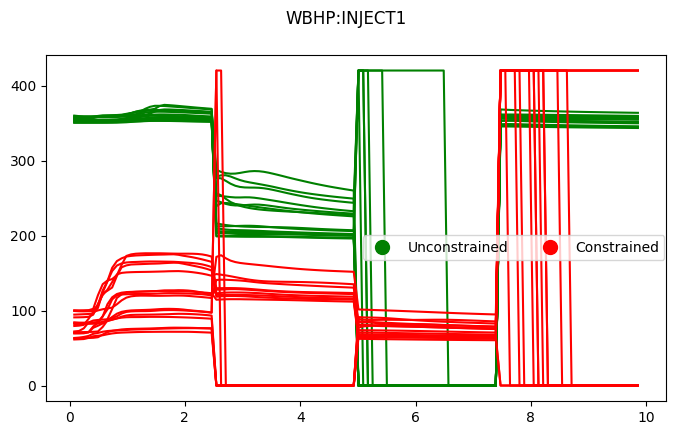

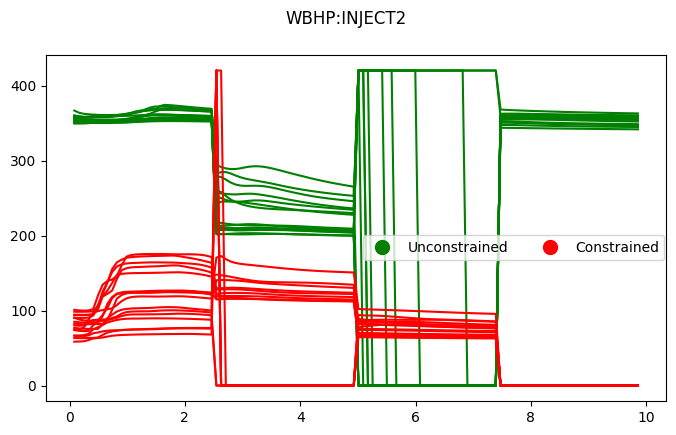

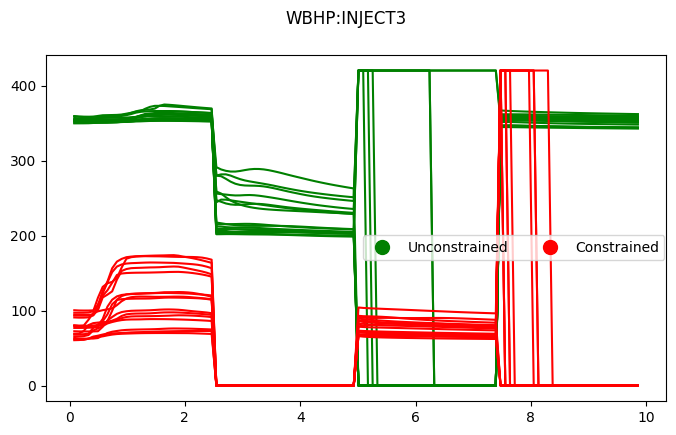

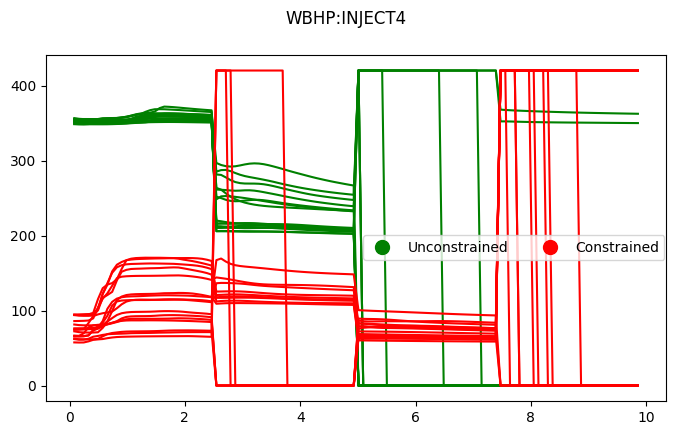

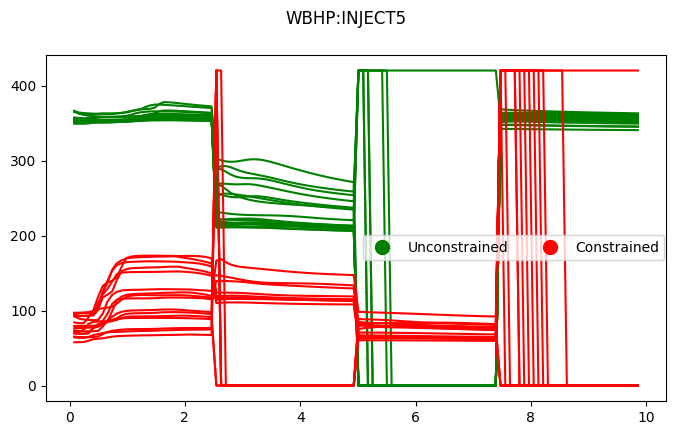

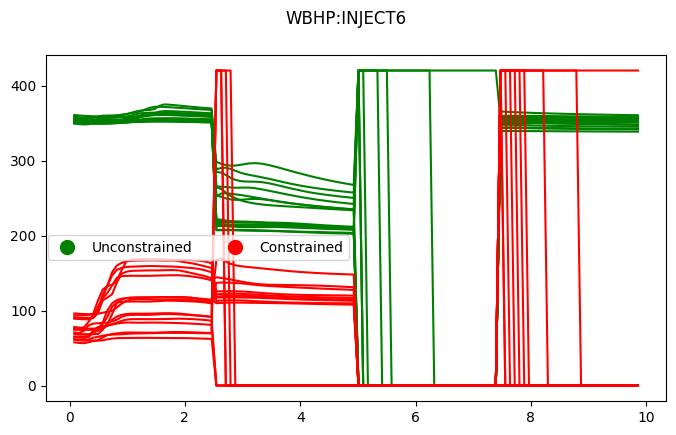

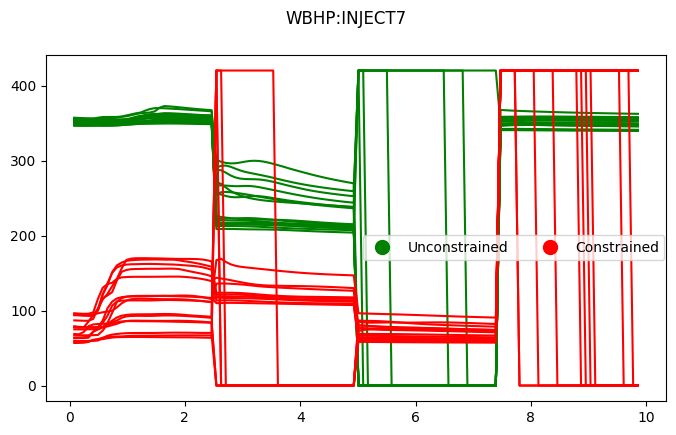

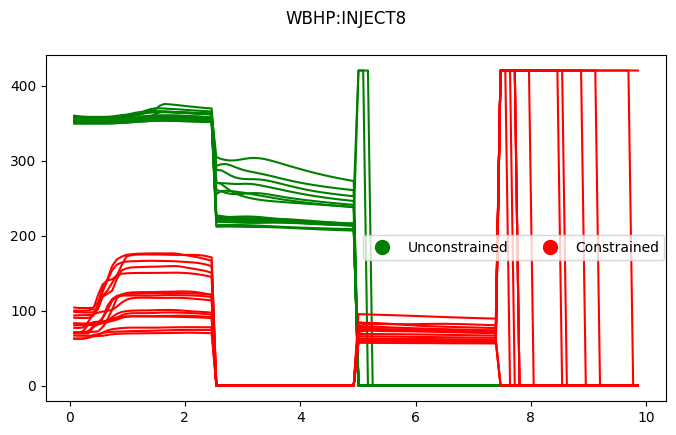

In [9]:
inje_names = ["INJECT1", "INJECT2", "INJECT3", "INJECT4", 
              "INJECT5", "INJECT6", "INJECT7", "INJECT8"]

for well in inje_names:
    prop_name = f"WBHP:{well}"
    # WBHP
    fig, ax = plt.subplots(figsize=(8,4.5))
    for i, _case in enumerate(study_paths.keys()):
        study = read_json(study_paths[_case])    
        years = np.load(study['extension']['optimization']['YEARS'])
        
        vectors = []
        for real_name in summary_data[_case].keys():
            sum_path = summary_data[_case][real_name][prop_name]
            vector = np.load(sum_path)
            vectors.append(vector)
        
        vectors = np.array(vectors).T
        print(vectors.shape)
        # vectors = np.mean(vectors, axis=1)

        ax.plot(years, vectors, color=COLORS[i])
        
    fig.suptitle(prop_name)
    plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
            loc='best', ncol=2, numpoints=1 )

KeyError: 'WGPR:PROD1'

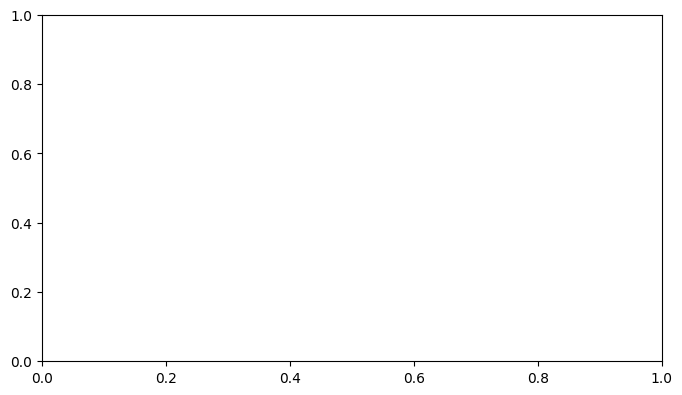

In [10]:
prod_names = ["PROD1", "PROD2", "PROD3", "PROD4"]

for well in prod_names:
    prop_name = f"WGPR:{well}"
    # WBHP
    fig, ax = plt.subplots(figsize=(8,4.5))
    for i, _case in enumerate(study_paths.keys()):
        study = read_json(study_paths[_case])    
        years = np.load(study['extension']['optimization']['YEARS'])
        
        vectors = []
        for real_name in summary_data[_case].keys():
            sum_path = summary_data[_case][real_name][prop_name]
            vector = np.load(sum_path)
            vectors.append(vector)
        
        vectors = np.array(vectors).T
        # vectors = np.mean(vectors, axis=1)

        ax.plot(years, vectors, color=COLORS[i])
        
    fig.suptitle(prop_name)
    plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
            loc='best', ncol=2, numpoints=1 )

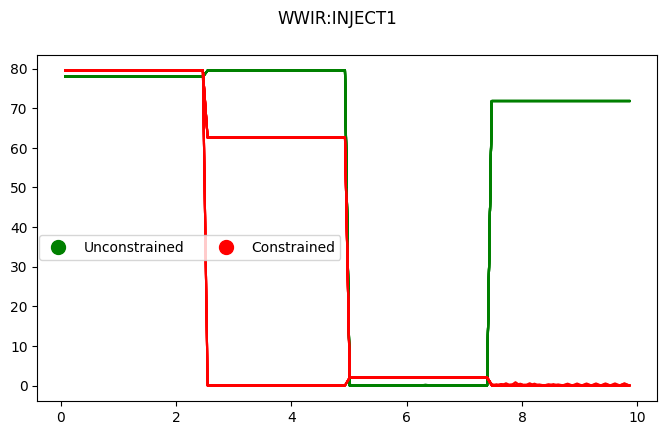

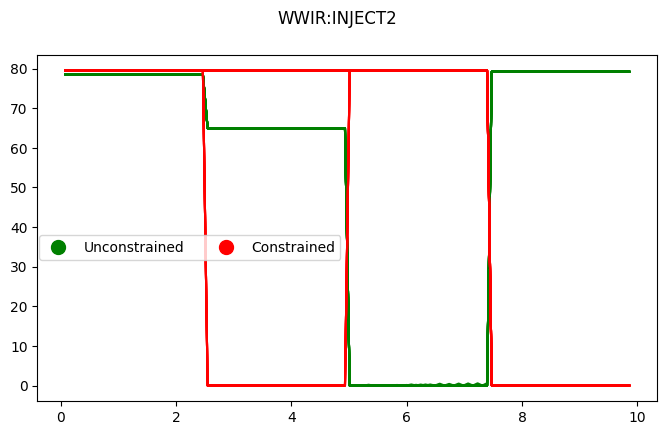

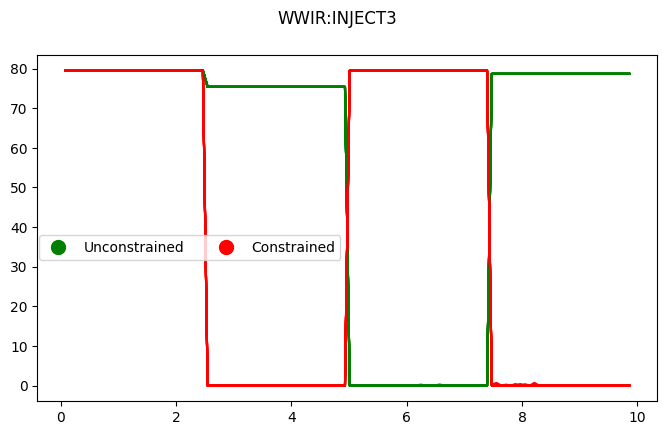

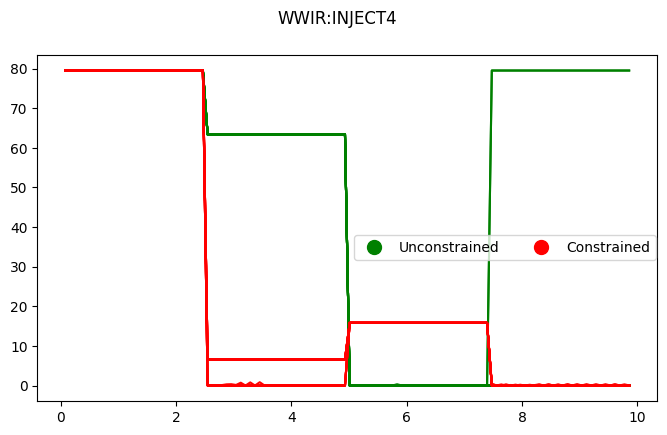

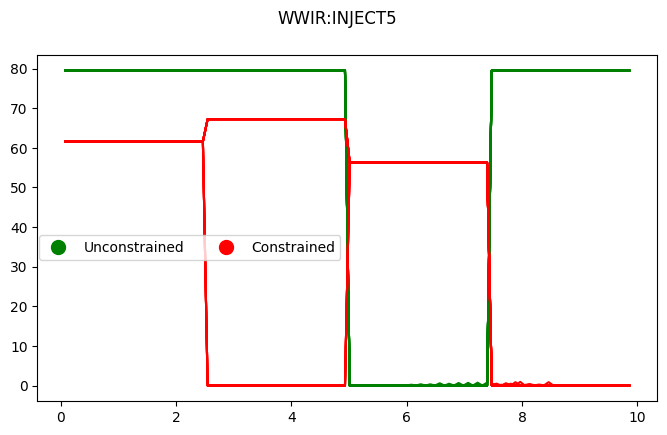

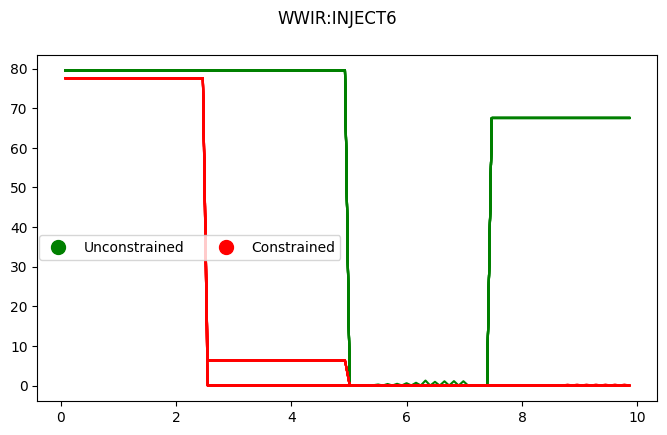

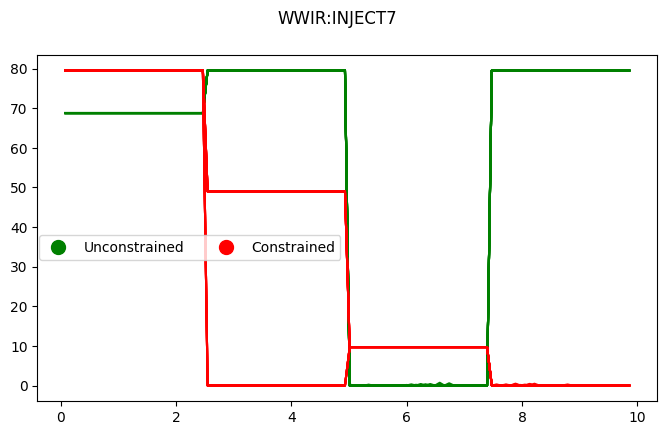

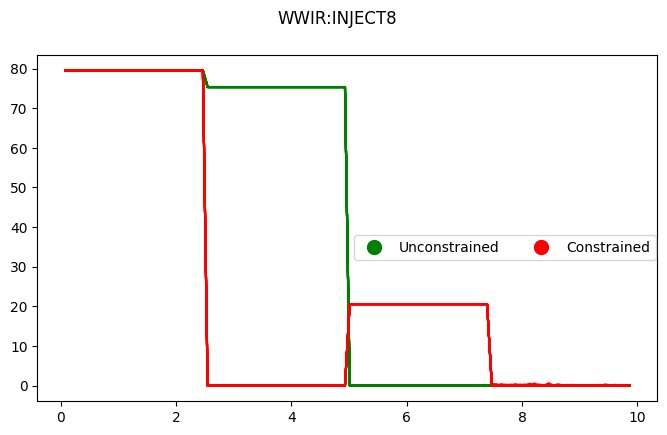

In [11]:
inje_names = ["INJECT1", "INJECT2", "INJECT3", "INJECT4", 
              "INJECT5", "INJECT6", "INJECT7", "INJECT8"]

for well in inje_names:
    prop_name = f"WWIR:{well}"
    # WBHP
    fig, ax = plt.subplots(figsize=(8,4.5))
    for i, _case in enumerate(study_paths.keys()):
        study = read_json(study_paths[_case])    
        years = np.load(study['extension']['optimization']['YEARS'])
        
        vectors = []
        for real_name in summary_data[_case].keys():
            sum_path = summary_data[_case][real_name][prop_name]
            vector = np.load(sum_path)
            vectors.append(vector)

            _year = np.load(summary_data[_case][real_name]['YEARS'])
            ax.plot(_year, vector, color=COLORS[i])
            
        # vectors = np.array(vectors).T
        # # vectors = np.mean(vectors, axis=1)

        # ax.plot(years, vectors, color=COLORS[i])
        
    fig.suptitle(prop_name)
    plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
            loc='best', ncol=2, numpoints=1 )

In [ ]:
for v in vectors:
    print(v.shape)

(30,)
(42,)
(30,)
(30,)
(36,)
(30,)
(44,)
(30,)
(36,)
(48,)
(35,)
(30,)
(44,)
(39,)
(44,)
(37,)
